## In-Class Assignment 5

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile  
from qiskit_aer import AerSimulator  
from qiskit.visualization import plot_histogram 
import numpy as np  

Create a circuit that checks whether two 2-bit numbers (represented by qubits) are equal in the computational basis.  

The circuit will have 5 qubits. Qubits 0 and 1 are the first input, Qubits 2 and 3 are the second input, and qubit 4 is the output: it should be 1 if and only if the inputs are equal -- that is, they represent the same binary number.

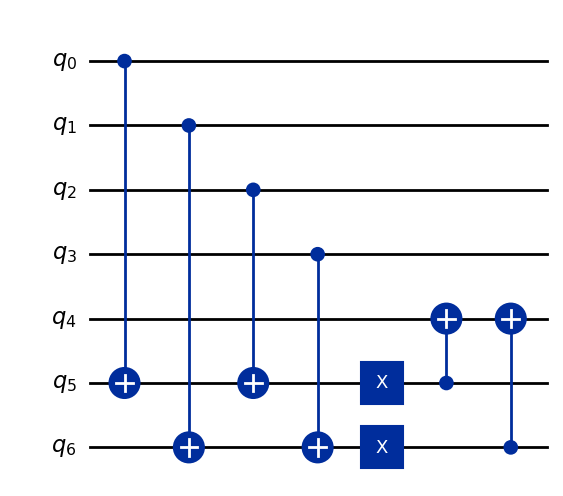

In [17]:
qc = QuantumCircuit(7)
qc.cx(0,5)
qc.cx(2,5)
qc.x(5)
qc.cx(1,6)
qc.cx(3,6)
qc.x(6)
qc.cx([5,6],4)
qc.draw('mpl')

Now create a function that takes three quantum registers (two inputs and one output) and determines if they are equal in the computational basis.  You should assume that the input registers are the same size, and the output register is one qubit. 

If you need to add ancilla qubits, use [`QuantumCircuit.add_register()`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.add_register).

In [18]:
def isEqual(a, b, out): 
    qc = QuantumCircuit(a,b,out)  
    return qc


Show your circuit for a pair of 3-qubit registers.

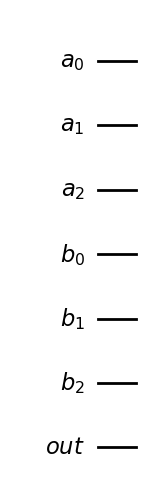

In [19]:
qa = QuantumRegister(3, 'a')  
qb = QuantumRegister(3, 'b')  
qout = QuantumRegister(1, 'out') 
isEqual(qa, qb, qout).decompose().draw('mpl')

Create a circuit to test your function.  Set up two input registers.  Make the first be an equal superposition of all values, and make the second any input you like -- perhaps a superposition of two values.  Append your circuit and then measure the input and output registers.

In [22]:
# test_ckt = QuantumCircuit(7)
# q1 = QuantumRegister(3,'1')
# q2 = QuantumRegister(3,'2')
# qout = QuantumRegister(1, 'out') 

def isEqual(a,b,out):
    qc = QuantumCircuit(a,b,out)
    n = len(a)
    qa = QuantumRegister(n,'anc')
    qc.add_register(qa)
    for i in range(0,n):
        qc.cx(a[i], qa[i])
        qc.cx(b[i], qa[i])
        qc.x(qa[i])
    qc.mcx(qa,out[0])
    return qc




qa = QuantumRegister(3,'a')
qa = QuantumRegister(3,'b')
qout = QuantumRegister(1,'out')
isEqual(qa,qb,qout).draw('mpl')



CircuitError: 'register name "b" already exists'

Run a simulation to check the functioning of your circuit.

In [ ]:
# Transpile for simulator
simulator = AerSimulator()
tc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(tc).result()
counts = result.get_counts()
print(counts)  
plot_histogram(counts)  